<a href="https://colab.research.google.com/github/harishkollana/Face-Emotion-Recognition/blob/main/Face_Emotion_Recognition_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

**The Indian education landscape has been undergoing rapid changes for the past 10 years owing to the advancement of web-based learning services, specifically, eLearning platforms.
Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market is growing on a rapid scale, there are major challenges associated with digital learning when compared with brick and mortar classrooms. One of many challenges is how to ensure quality learning for students. Digital platforms might overpower physical classrooms in terms of content quality but when it comes to understanding whether students are able to grasp the content in a live class scenario is yet an open-end challenge.
In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who need special attention. Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the mood. Because of this drawback, students are not focusing on content due to lack of surveillance.
While digital platforms have limitations in terms of physical surveillance but it comes with the power of data and machines which can work for you. It provides data in the form of video, audio, and texts which can be analysed using deep learning algorithms. Deep learning backed system not only solves the surveillance issue, but it also removes the human bias from the system, and all information is no longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.
We will solve the above-mentioned challenge by applying deep learning algorithms to live video data. The solution to this problem is by recognizing facial emotions.**

# **Face Emotion Recognition**
**This is a live face emotion detection system. The model should be able to real-time identify the emotions of students in a live class.**

# **Dataset Information**
**The model is trained on the FER-2013 dataset .This dataset consists of 35887 grayscale, 48x48 sized face images with seven emotions - angry, disgusted, fearful, happy, neutral, sad and surprised. Here is the dataset link:- https://www.kaggle.com/msambare/fer2013**

In [1]:
!nvidia-smi

Fri Mar 18 12:01:55 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **Importing Libraries**

In [2]:
# importing libraries
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.preprocessing.image import load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation
from tensorflow.keras.models import Model, Sequential
from keras.applications.nasnet import NASNetLarge
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from keras import regularizers

**Importing DeepFace**

**Deepface is a lightweight face recognition and facial attribute analysis (age, gender, emotion and race) framework for python.**

In [3]:
#installing deep face 
!pip install deepface

     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 2.3 MB 12.0 MB/s 
     |████████████████████████████████| 462 kB 43.1 MB/s 


In [4]:
#calling the dependencies
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


**Findind Version of Packages Installed**

In [5]:
!python --version

Python 3.7.12


In [6]:
import keras
keras.__version__

'2.8.0'

In [7]:
import tensorflow
tensorflow.__version__

'2.8.0'

In [8]:
import numpy
numpy.__version__

'1.21.5'

**Exploring Deep Face**

In [9]:
#confirming the path of images
img1 = cv2.imread("/content/Sample Data/Pawan Kalyan 1.jpg")
img2 = cv2.imread("/content/Sample Data/Pawan Kalyan 2.jpg")

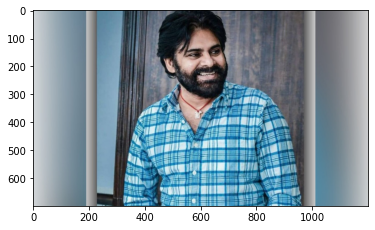

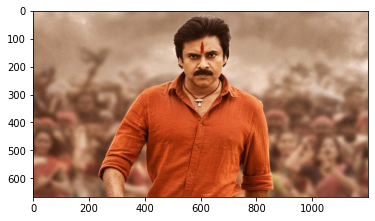

In [10]:
#plotting images 
plt.imshow(img1[:, :, ::-1 ]) #setting value as -1 to maintain saturation
plt.show()
plt.imshow(img2[:, :, ::-1 ]) 
plt.show()

**It is a hybrid face recognition framework wrapping state-of-the-art models: VGG-Face, Google FaceNet, OpenFace, Facebook DeepFace, DeepID, ArcFace and Dlib. The library is mainly based on Keras and TensorFlow.**

# **Fitting Models**

## **VGG Face Model**

In [11]:
#calling VGGFace
model_name = "VGG-Face"
model = DeepFace.build_model(model_name)

vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:02<00:00, 221MB/s]


**Calling verify function**

In [12]:
#using verify function

#validate our images
result = DeepFace.verify("/content/Sample Data/Pawan Kalyan 1.jpg","/content/Sample Data/Pawan Kalyan 2.jpg")

#generating result of comparison 
DeepFace.verify(img1,img2)

{'detector_backend': 'opencv',
 'distance': 0.37228742339391496,
 'model': 'VGG-Face',
 'similarity_metric': 'cosine',
 'threshold': 0.4,
 'verified': True}

**In Output result we can see that both images are same and our model is also
predicting the same.**

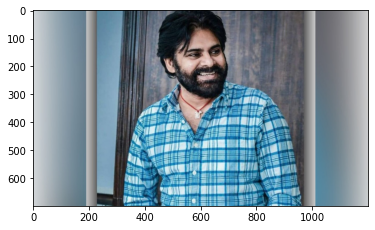

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 66.9MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:11<00:00, 47.0MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:06<00:00, 79.2MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:04<00:00, 108MB/s]
Action: emotion: 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]




39  years old  indian   happy   Man


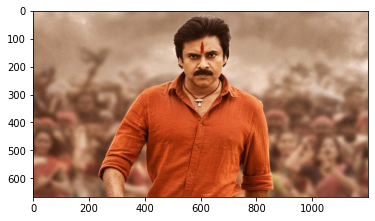

Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]



46  years old  indian   angry   Man


In [13]:
#setting value as -1 to maintain saturation
plt.imshow(img1[:, :, ::-1 ])
plt.show()

#creating an object to analyze facial features
obj = DeepFace.analyze(img_path = img1, actions = ['age', 'gender', 'race', 'emotion'])
print("\n")
 
#checking age, race, emotion and gender using DEEPFACE for image 1
print(obj["age"]," years old ",obj["dominant_race"]," ",obj["dominant_emotion"]," ", obj["gender"])
plt.imshow(img2[:, :, ::-1 ]) 
plt.show()

#creating an object to analyze facial features
obj = DeepFace.analyze(img_path = img2, actions = ['age', 'gender', 'race', 'emotion'])
print("\n")
 
#checking age, race, emotion and gender using DEEPFACE for image 2
print(obj["age"]," years old ",obj["dominant_race"]," ",obj["dominant_emotion"]," ", obj["gender"])

**From both first and second images the model correctly preditcted the emotion.**

**Let's verify model with more images**

In [14]:
#setting path for different image
img3_path = "/content/Sample Data/Mahesh Babu.webp" 
img3 = cv2.imread(img3_path)

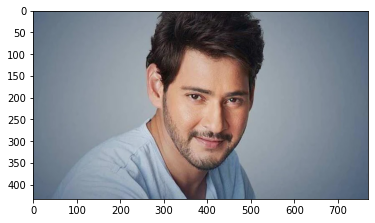

Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  4.00it/s]



29  years old  middle eastern   sad   Man


In [15]:
plt.imshow(img3[:, :, ::-1 ]) 
plt.show()

#creating an object to analyze facial features
obj = DeepFace.analyze(img_path = img3, actions = ['age', 'gender', 'race', 'emotion'])
print("\n")

#checking age, race, emotion and gender using DEEPFACE for image 3
print(obj["age"]," years old ",obj["dominant_race"]," ",obj["dominant_emotion"]," ", obj["gender"])

**The emotion predicted by model is sad which is incorrect , it should be "happy" emotion**

**The Deep Face model is not giving us good results. Let's try another approach.**

In [16]:
#comparing the faces in images using VGG Face
DeepFace.verify(img1, img3)

{'detector_backend': 'opencv',
 'distance': 0.5289800973779065,
 'model': 'VGG-Face',
 'similarity_metric': 'cosine',
 'threshold': 0.4,
 'verified': False}

##Using Transfer Learning

Transfer learning is the reuse of a pre-trained model on a new problem.

In transfer learning, the knowledge of an already trained machine learning model is applied to a different but related problem.

we basically try to exploit what has been learned in one task to improve generalization in another. We transfer the weights that a network has learned at "task A" to a new "task B."

##VGG16
###VGG16 is a convolution neural net (CNN ) architecture which was used to win ILSVR(Imagenet) competition in 2014.
###The 16 in VGG16 refers to it has 16 layers that have weights. This network is a pretty large network and it has about 138 million (approx) parameters.

**Load Data**

In [17]:
ls

 dataset.zip   drive/   sample_data/  'Sample Data'/


In [18]:
!unzip /content/dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [19]:
# path for train dataset
path="/content/train"

In [20]:
# path for test dataset
pathTest = "/content/test"

(48, 48, 3)


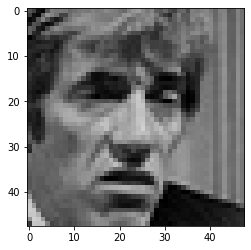

In [21]:
#Plotting one of the image from train dataset
from keras.preprocessing import image
img = image.load_img(path+"/disgust/Training_11732399.jpg",target_size=(48,48))
img = np.array(img)
plt.imshow(img)

#checking the shape of the image
print(img.shape)

**Counting number of images for each emotion in training dataset**

In [22]:
# count of emotions.
import os
total_images = 0
for dir_ in os.listdir(path):
    count = 0
    for f in os.listdir(path +"/" +dir_ + "/"):
        count += 1
        total_images += 1
    print(f"{dir_} has {count} number of images")
    
print(f"\ntotal images are {total_images}")

happy has 7215 number of images
disgust has 436 number of images
neutral has 4965 number of images
angry has 3995 number of images
sad has 4830 number of images
fear has 4097 number of images
surprise has 3171 number of images

total images are 28709


**Implementing VGG16**

In [23]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=(48,48,3), weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [24]:
# useful for getting number of classes
folders = glob(path+"/*")

In [25]:
# flatten vgg output and include output layer according to our use case
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [26]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

**Model Summary**

In [27]:
# view the structure of the model
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

**Compile Model**

In [28]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

**Data Augmentation**

In [29]:
#Augumenting Training images
train_datagen = ImageDataGenerator( rescale = 1./255,
                                    validation_split = 0.2,
                                    rotation_range=5,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    fill_mode='nearest')


#Augumenting Test images
test_datagen  = ImageDataGenerator( rescale = 1./255 )

# generate training set
training_set = train_datagen.flow_from_directory(path,
                                                 target_size = (48, 48),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')
# generate test set
test_set = test_datagen.flow_from_directory(pathTest,
                                            target_size = (48, 48),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**Fitting Model**

In [30]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  verbose=1
)

Epoch 1/5
449/449 [==============================] - 71s 149ms/step - loss: 1.8238 - accuracy: 0.2475 - val_loss: 1.8126 - val_accuracy: 0.2471
Epoch 2/5
449/449 [==============================] - 65s 144ms/step - loss: 1.7508 - accuracy: 0.2762 - val_loss: 1.6788 - val_accuracy: 0.3047
Epoch 3/5
449/449 [==============================] - 64s 143ms/step - loss: 1.6837 - accuracy: 0.3054 - val_loss: 1.6807 - val_accuracy: 0.3057
Epoch 4/5
449/449 [==============================] - 65s 144ms/step - loss: 1.6519 - accuracy: 0.3277 - val_loss: 1.7040 - val_accuracy: 0.3459
Epoch 5/5
449/449 [==============================] - 64s 143ms/step - loss: 1.5467 - accuracy: 0.3891 - val_loss: 1.4653 - val_accuracy: 0.4209


**Model Evaluation**

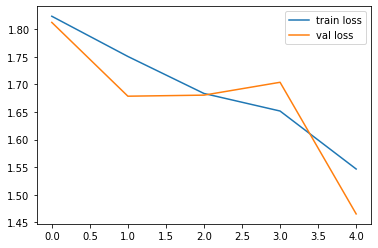

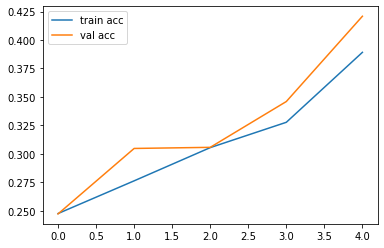

In [31]:
#Visualization of model performance
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

**save the model**

In [32]:
#saving the model
model.save('Final_model_TL_VGG16.h5')

# **Building Custom CNN Model**

In [33]:
image_size= 48
batch_size= 64
#Augumenting train images
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

#generate train set
training_set = train_datagen.flow_from_directory(path,
                                                batch_size=64,
                                                target_size=(image_size, image_size),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')
#Augumenting test images
test_datagen = ImageDataGenerator(rescale=1./255)
#generate test set
test_set = test_datagen.flow_from_directory(pathTest,
                                                batch_size=64,
                                                target_size=(image_size, image_size),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**Creating CNN Model**

In [34]:
#defining function to create custom CNN model
def model_2(input_size, classes=7):
    model= tf.keras.models.Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
    model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    

    model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    #Faltten the model
    model.add(Flatten())
    
    
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    
    
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(classes, activation='softmax'))
    opt = Adam(lr=0.0001 , decay=1e-6)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary
    return model

**Model Summary**

In [35]:
#model summary
row, col = 48, 48
classes = 7
model_2 = model_2((row,col,1), classes)
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_69 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 conv2d_70 (Conv2D)          (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation_7 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 24, 24, 64)       

In [36]:
import datetime
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

#Using callbacks and `early stopping` for avoiding overfitting of training data and `ReduceLROnPlateau` for learning rate
checkpoint = ModelCheckpoint(filepath="'model.h5'",
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss')

earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training.log')

callbacks_list = [checkpoint, reduce_lr, csv_logger]

**Model Training**

In [37]:
steps_per_epoch = training_set.n // training_set.batch_size
validation_steps = test_set.n // test_set.batch_size

# fit the model
model_2_hist = model_2.fit(x=training_set,
                 validation_data=test_set,
                 epochs=50,
                 callbacks=callbacks_list,
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps)

Epoch 1/50
448/448 [==============================] - ETA: 0s - loss: 8.4364 - accuracy: 0.2207
Epoch 1: val_loss improved from inf to 7.52299, saving model to 'model.h5'
448/448 [==============================] - 46s 95ms/step - loss: 8.4364 - accuracy: 0.2207 - val_loss: 7.5230 - val_accuracy: 0.2473 - lr: 1.0000e-04
Epoch 2/50
448/448 [==============================] - ETA: 0s - loss: 6.7416 - accuracy: 0.2545
Epoch 2: val_loss improved from 7.52299 to 5.91190, saving model to 'model.h5'
448/448 [==============================] - 43s 97ms/step - loss: 6.7416 - accuracy: 0.2545 - val_loss: 5.9119 - val_accuracy: 0.2772 - lr: 1.0000e-04
Epoch 3/50
448/448 [==============================] - ETA: 0s - loss: 5.3099 - accuracy: 0.2855
Epoch 3: val_loss improved from 5.91190 to 4.60456, saving model to 'model.h5'
448/448 [==============================] - 42s 93ms/step - loss: 5.3099 - accuracy: 0.2855 - val_loss: 4.6046 - val_accuracy: 0.3362 - lr: 1.0000e-04
Epoch 4/50
448/448 [=========

**Model Evaluation**

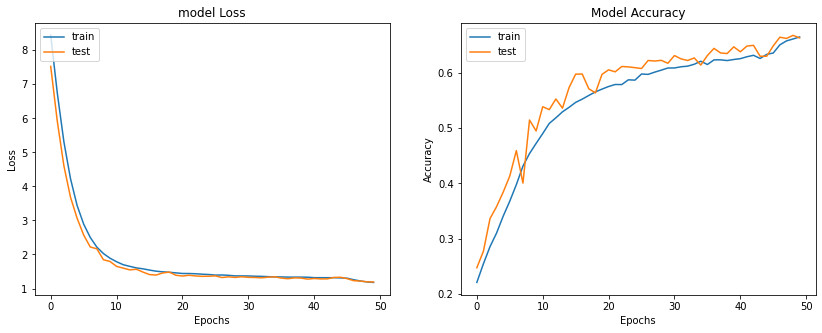

In [38]:
# visualization metrics plot
# accuracy
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(model_2_hist.history['accuracy'])
plt.plot(model_2_hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

#Loss
plt.subplot(1,2,1)
plt.plot(model_2_hist.history['loss'])
plt.plot(model_2_hist.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**save the model**

In [39]:
#save the model
model_2.save('Final_model_Custome_CNN.h5')

In [41]:
fer_json = model_2.to_json()  
with open("fer.json", "w") as json_file:  
    json_file.write(fer_json)  
model_2.save_weights("fer.h5")